In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'1.14.0'

In [6]:
np.random.seed(123)

dataset = np.mat(
    list(
        map(
            lambda x: [1 if x[0] == 1 else -1, -1 if x[0] == 1 else 1],
            np.random.randint(0, 2, size=(100, 1))
        )
    )
)
# dataset = np.mat([
#     [0, 1],
#     [1, 0]
# ])
dataset[:, [1]][:10]

matrix([[ 1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1]])

In [7]:
model = keras.Sequential([
    layers.Dense(1, activation=tf.sigmoid, input_shape=[1])
])
model.compile(loss=tf.losses.sigmoid_cross_entropy, optimizer=keras.optimizers.SGD(1))

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print(epoch, logs['loss'])
            
history = model.fit(
    dataset[:, [0]],
    dataset[:, [1]],
    epochs=200,
#     validation_split=0.2,
    verbose=0,
    callbacks=[PrintDot()]
)
history

0 1.0547206115722656
100 0.4868010473251343


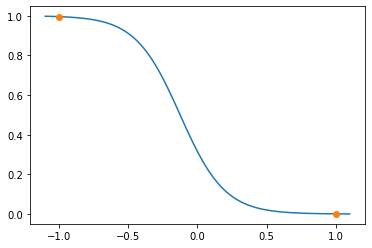

In [8]:
x = np.linspace(-1.1, 1.1, 100)
y = model.predict(x)
# print(y)

fig, ax = plt.subplots()

ax.plot(x, y)

x_points = np.mat([[-1], [1]])
ax.plot(x_points, model.predict(x_points), 'o')